Preambule 28
Preambule 10
Preambule 66


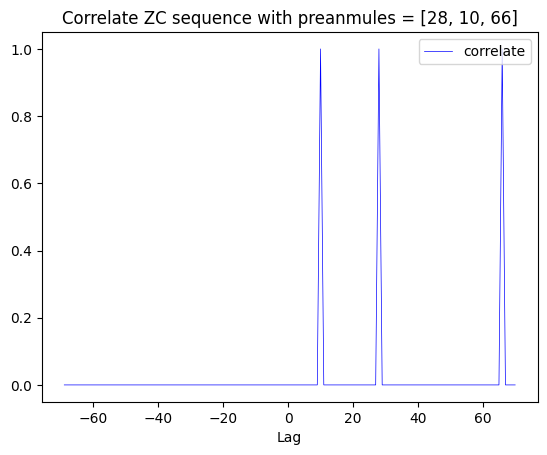

In [52]:
import numpy as np
from matplotlib import pyplot as plt
import sdr

# Apply fft to ZC squence
# Params: N - length, r1 - root index of ZC sequence
N = 139
N_sf = 140
# Root index of sequence
r1 = 23

# Shift for generate preambules
SHIFTS = [28, 10, 66]

# Treshhold
TRH = 0.99

# Generate ZC
SEQUENCE_1 = sdr.zadoff_chu_sequence(N, r1)
L = len(SEQUENCE_1)

xcorr = []

for i in SHIFTS:
    sequence_shifted = sdr.zadoff_chu_sequence(N, r1, shift=i)
    xcorr_i = np.correlate(np.roll(np.tile(SEQUENCE_1, 2), -N//2), sequence_shifted, mode="valid")
    lag = np.arange(-N//2 + 1, N//2 + 2)
    xcorr.append(xcorr_i)
    
    if abs(max(xcorr_i)) > TRH:
        print(f"Preambule {i}")
    

plt.figure()
# plt.plot(lag, (np.abs(xcorr + xcorr1) + noise) / L, label='s(t) + n(t)', color='r', linewidth=1, markersize=3)
plt.plot(lag, np.abs(sum(xcorr)) / L, label='correlate', color='b', linewidth=0.5, markersize=3)
plt.xlabel("Lag")
plt.title(f"Correlate ZC sequence with preanmules = {SHIFTS}")
plt.legend(loc='upper right')
plt.show()